<a href="https://colab.research.google.com/github/ektakum13/GDP-Prediction/blob/main/Predicting_GDP_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#import the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV projects/countries of the world_data.csv", decimal = ",")

In [ ]:
data.shape

(227, 20)

In [ ]:
#First few rows of dataset
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


<Axes: >

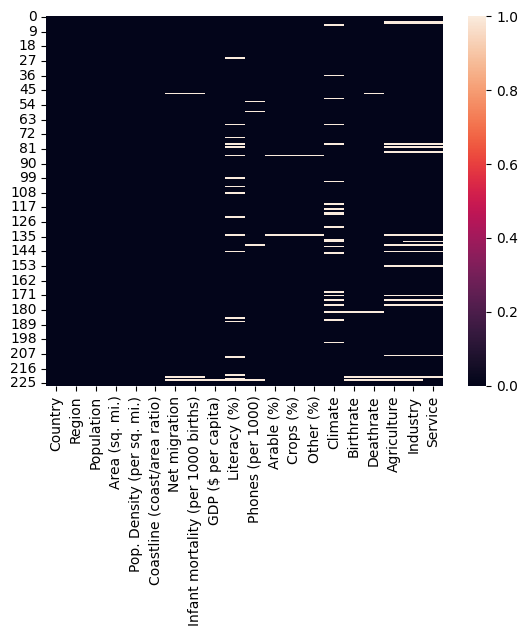

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
#looking for missing values in the dataset
print("Number of missing data:")
print(df.isnull().sum())

Number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [ ]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
data.shape

(179, 20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Y = df["GDP ($ per capita)"]
Y

,GDP ($ per capita)
0,700.0
1,4500.0
2,6000.0
3,8000.0
4,19000.0
...,...
222,800.0
223,NaN
224,800.0
225,800.0


#Gropup Imputation





In [ ]:
df.groupby('Region')[['GDP ($ per capita)','Area (sq. mi.)','Population']].median()

,GDP ($ per capita),Area (sq. mi.),Population
Region,,,
ASIA (EX. NEAR EAST),3450.0,208920.0,26336502.5
BALTICS,11400.0,64589.0,2274735.0
C.W. OF IND. STATES,3450.0,203050.0,7641217.0
EASTERN EUROPE,9100.0,67704.0,6412407.5
LATIN AMER. & CARIB,6300.0,22966.0,1065842.0
NEAR EAST,9250.0,51825.0,3488139.5
NORTHERN AFRICA,6000.0,724000.0,21552552.5
NORTHERN AMERICA,29800.0,2166086.0,65773.0
OCEANIA,5000.0,811.0,114689.0


This code performs a context-aware imputation by grouping the data by 'Region' to calculate a specific replacement value (median for numbers, mode for categories) for each group. It then fills missing entries for each country using the value from its own region, making the imputed data more accurate and realistic than using a single global value.









In [ ]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

/tmp/ipython-input-2345154803.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]
/tmp/ipython-input-2345154803.py:9: SettingWithCopyWarning: 
A value is trying to

In [ ]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,0
Infant mortality (per 1000 births),0
GDP ($ per capita),0
Literacy (%),0


#Test for multicollinearity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
numerical_cols = df.select_dtypes(include=[float, int]).columns

# Drop the target variable if present, for example, 'GDP ($ per capita)'
# numerical_cols = numerical_cols.drop('GDP ($ per capita)')

# Calculate VIF for each feature
X = df[numerical_cols]
X['intercept'] = 1  # Add an intercept column for VIF calculation

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Drop the intercept column VIF
vif_data = vif_data[vif_data["feature"] != "intercept"]

print(vif_data)

                               feature           VIF
0                           Population      1.458478
1                       Area (sq. mi.)      1.413124
2           Pop. Density (per sq. mi.)      1.400316
3         Coastline (coast/area ratio)      1.351361
4                        Net migration      1.453340
5   Infant mortality (per 1000 births)      8.641048
6                   GDP ($ per capita)      4.116313
7                         Literacy (%)      3.003798
8                    Phones (per 1000)      5.148824
9                           Arable (%)  20080.444247
10                           Crops (%)   8251.651804
11                           Other (%)  30756.616009
12                             Climate      1.799679
13                           Birthrate      6.186518
14                           Deathrate      2.610897
15                         Agriculture    104.524073
16                            Industry     89.509735
17                             Service    135.

/tmp/ipython-input-2616268287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1  # Add an intercept column for VIF calculation


In [ ]:
X = data.drop(["Country", "Region", "GDP ($ per capita)"], axis=1)
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,13477,102,132.1,59.80,10.76,21.03,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,69108,443,156.0,34.54,-6.15,19.46,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,25730435,912050,28.2,0.31,-0.04,22.20,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,84402966,329560,256.1,1.05,-0.45,25.95,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,21456188,527970,40.6,0.36,0.00,61.50,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,11502010,752614,15.3,0.00,0.00,88.29,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(scaled_x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(scaled_x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 43366459.089123204
R-squared: 0.6587980557147424


In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()

xg.fit(scaled_x_train, y_train)

y_pred = xg.predict(scaled_x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 23406555.39029816
R-squared: 0.8158401129366502


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(xg, scaled_x_train, y_train, cv=5)

array([0.88244487, 0.7976635 , 0.77594429, 0.78642291, 0.89574636])

In [ ]:
lr.coef_

array([-4.72044051e+02,  4.62354699e+02,  3.15402337e+02,  2.15655379e+02,
        1.97193310e+03, -2.33176968e+03, -1.87788770e+02,  6.39063319e+03,
       -3.98757011e+06, -2.50387654e+06, -4.92352195e+06,  6.17958481e+02,
        5.08551401e+02,  1.14562197e+03, -6.96811784e+02,  1.68000135e+02,
       -7.23513743e+02])

In [ ]:
lr.intercept_

np.float64(8135.664335669609)

In [ ]:
y_pred

array([28631.805 , 27242.701 , 27432.893 , 22288.594 , 22036.033 ,
       17365.955 ,  4880.5996, 19769.082 ,  2484.3188,  5640.651 ,
       12016.278 , 16216.209 ,  3218.343 ,  4770.459 , 20577.818 ,
        8558.3125,  3838.8489,  1855.6073,  8345.093 ,  4363.707 ,
        5709.3403,  1821.6476, 28596.04  ,  1019.7881, 28538.076 ,
        1039.8334, 13381.669 , 15467.21  , 12377.259 ,  1817.8568,
       25132.459 , 16238.714 ,   971.4596,  5623.32  ,  1350.6989,
        8977.768 ], dtype=float32)

In [ ]:
# calculating residuals

residuals = y_pred - y_test
residuals

,GDP ($ per capita)
93,-2268.195312
19,-1857.298828
76,-167.107422
146,-6311.406250
91,-6763.966797
22,-18634.044922
155,-8219.400391
28,3769.082031
77,284.318848
193,1640.650879


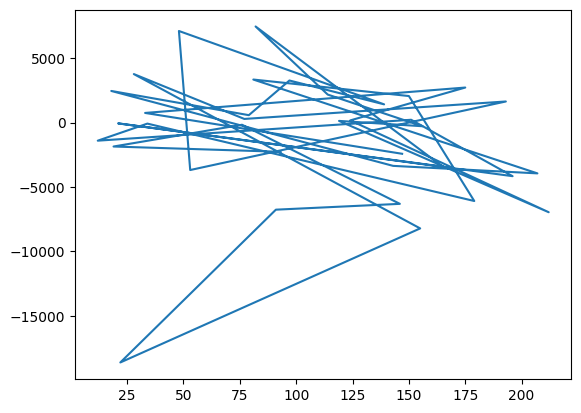

In [ ]:
plt.plot(residuals)

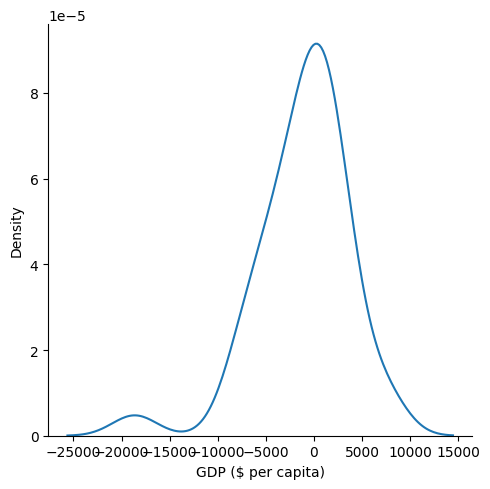

In [ ]:
sns.displot(residuals, kind = 'kde')

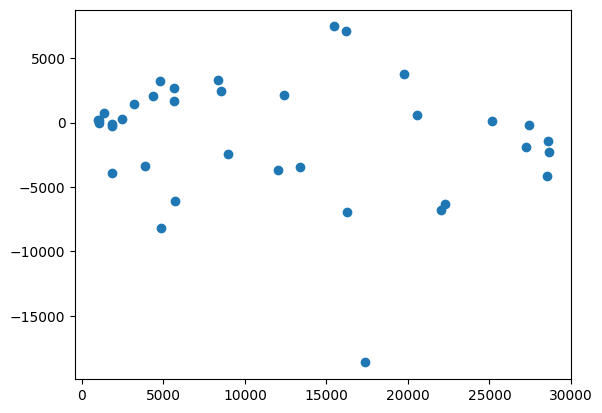

In [ ]:
## looking for autocorrelation

plt.scatter(y_pred, residuals)

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Add a constant to the exogenous variables
X = sm.add_constant(x_test)


# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, X)

# Print the results
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f_pvalue']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(33.85087206944905), 'p-value': np.float64(0.008776106315707282), 'f-value': np.float64(16.67750873678876), 'f_pvalue': np.float64(1.0710290164126081e-07)}
